# 페이스북 광고 데이터 분석

- 분석은 ROAS 지표를 목표로. 
- 이 예비 분석은 추가 캠페인이 30-34 세 그룹, 특히 남성에 초점을 두어야한다는 것을 시사. 
- 광고비는 45-49 세 그룹을 대상으로하는 것이 가장 효과적입니다. 
- 그러나 이러한 결론과 관련된 클릭 수는 일부 경우에 낮으므로 이러한 그룹을 타겟팅 할 때 통계적으로 유의미한 것을 보여주는 추가 작업이 필요

In [381]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

In [339]:
df = pd.read_csv("fbdata.csv")

In [340]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [341]:
df['CTR'] = (df['Clicks']/df['Impressions']*100)
df['CPC'] = df['Spent']/df['Clicks']

In [342]:
subset_df = df[['CTR', 'CPC', 'Approved_Conversion', 'Total_Conversion', 'Impressions', 'Spent', 'Clicks']].copy()

In [343]:
subset_df.head()

,CTR,CPC,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
0,0.013605,1.43,1,2,7350,1.43,1
1,0.011198,0.91,0,2,17861,1.82,2
2,0.000000,NaN,0,1,693,0.00,0
3,0.023480,1.25,0,1,4259,1.25,1
4,0.024195,1.29,1,1,4133,1.29,1


## 클릭과 관련있는 변수들의 상관관계 시각화

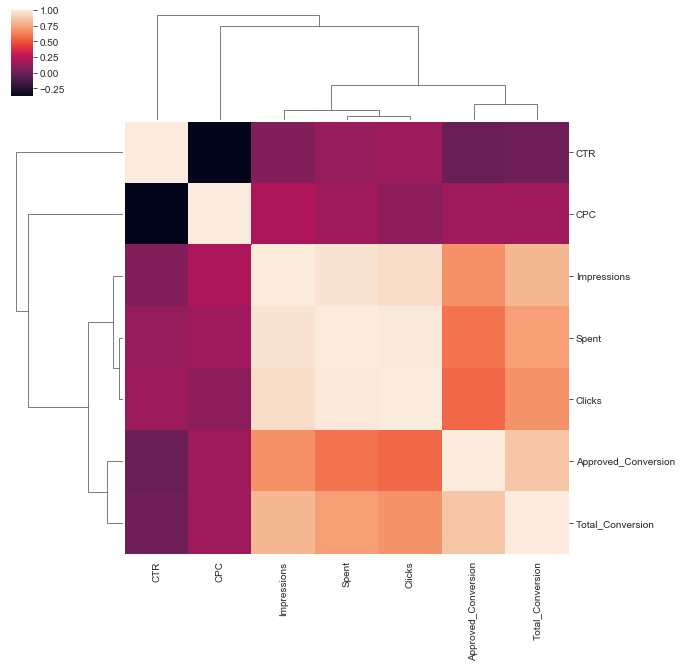

In [344]:
p1 = sns.clustermap(subset_df.corr())
p1

In [345]:
corr = subset_df.corr(method='pearson')#.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
corr

,CTR,CPC,Approved_Conversion,Total_Conversion,Impressions,Spent,Clicks
CTR,1.000000,-0.378854,-0.006602,0.010721,0.075914,0.140952,0.159290
CPC,-0.378854,1.000000,0.170040,0.160828,0.208556,0.165464,0.112676
Approved_Conversion,-0.006602,0.170040,1.000000,0.864034,0.684249,0.593178,0.559526
Total_Conversion,0.010721,0.160828,0.864034,1.000000,0.812838,0.725379,0.694632
Impressions,0.075914,0.208556,0.684249,0.812838,1.000000,0.970386,0.948514
Spent,0.140952,0.165464,0.593178,0.725379,0.970386,1.000000,0.992906
Clicks,0.159290,0.112676,0.559526,0.694632,0.948514,0.992906,1.000000


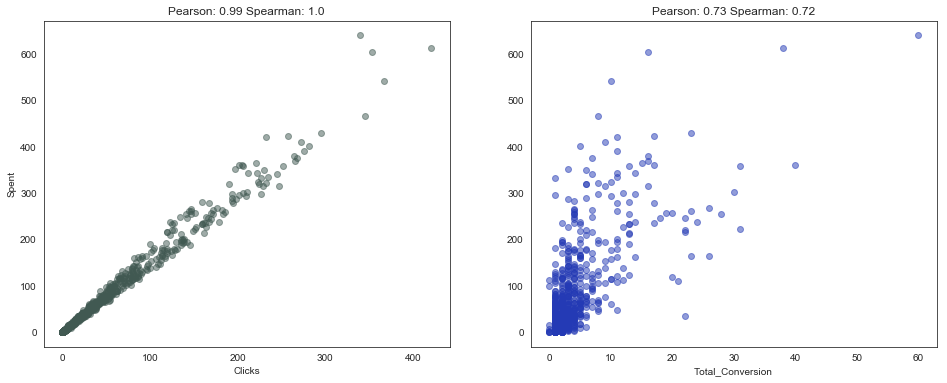

In [346]:

plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=2)

ax=ax.flatten()

cols = ['Clicks','Total_Conversion']
colors=['#415952', '#243AB5']#, '#243AB5','#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Spent')
    i.scatter(subset_df[cols[j]], subset_df['Spent'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%subset_df.corr().loc[cols[j]]['Spent'].round(2)+' Spearman: %s'%subset_df.corr(method='spearman').loc[cols[j]]['Spent'].round(2))
    j+=1


plt.show()

- 지출이 많을수록 더 많은 클릭이 발생하며 더 많은 전환이 발생
- 그러나 원하는 비즈니스 성과를 향상시키고이 경우 수익을 극대화하려면 실행 가능한 인사이트를 위해 여러 캠페인으로 분류하여 차례로 분석

In [347]:
 df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.011198,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.023480,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.024195,1.29


## 바이올린 플롯으로 캠페인별 분포 확인하기

- 캠페인 1178 이 광고비를 많이 소진했으니 더 깊게 살펴보자

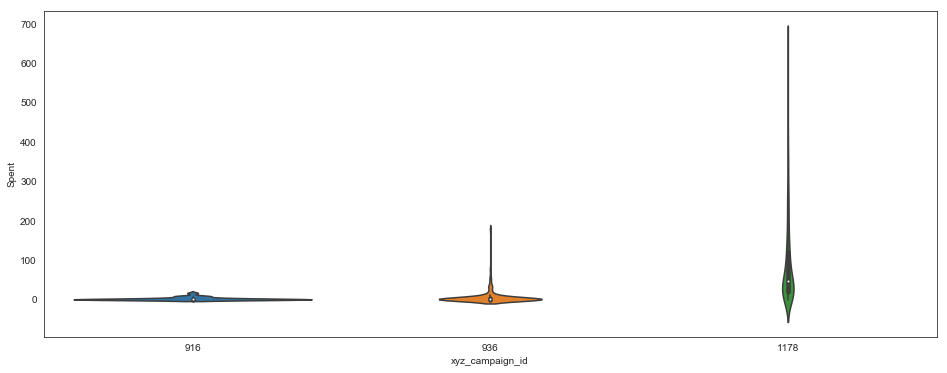

In [348]:
sns.violinplot(data = df, x='xyz_campaign_id', y='Spent' )

- 1178 캠페인만 필터링 해서 보자

In [349]:
cam_df = df[df['xyz_campaign_id'] ==1178]
cam_df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674


### 결측치
- 각 변수에 대한 결측 데이터의 백분율을 보여주는 아래 표에 표시된대로 결측 데이터의 양 확인
- 클릭 수와 지출이 0 인 NPC를 반환하는 CPC 변수에만 누락 된 값이 있음

In [350]:
columns = cam_df.columns

percentage_missing = cam_df.isnull().sum() * 100 / len(cam_df)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
ad_id,ad_id,0.00
xyz_campaign_id,xyz_campaign_id,0.00
fb_campaign_id,fb_campaign_id,0.00
age,age,0.00
gender,gender,0.00
interest,interest,0.00
Impressions,Impressions,0.00
Clicks,Clicks,0.00
Spent,Spent,0.00
Total_Conversion,Total_Conversion,0.00


### 전체 인구 통계학적 변수의 분포 확인

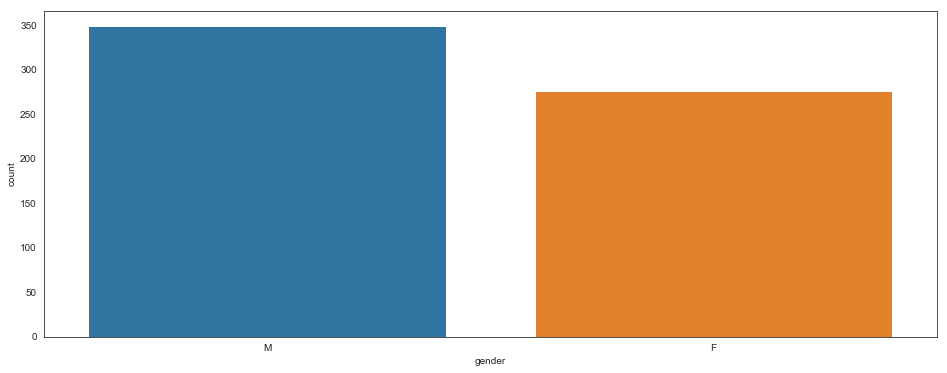

In [351]:
# load the tips dataset present by default in seaborn 
sns.set_style('white') 
sns.countplot(x ='gender', data = cam_df) 

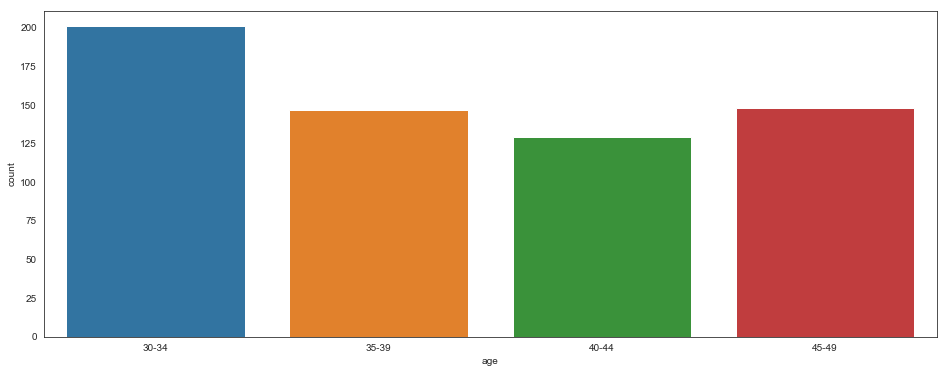

In [352]:
sns.countplot(x ='age', data = cam_df) 

- 사업 목표가 광고 비용으로 수익을 극대화하는 것이라면 ROAS 측정법이 매우 유용
- 전환 및 매출 금액을 알아야 됨
- 다음에서 전자는 5 파운드, 그 이후에는 100 파운드의 가치가 있다고 가정

## 피쳐엔지니어링

In [367]:
cam_df['totConv'] = cam_df.loc[:,'Total_Conversion'] + cam_df.loc[:,'Approved_Conversion']
cam_df['conVal'] = cam_df['Total_Conversion']*5
cam_df['appConVal'] = cam_df['Approved_Conversion'] * 100
cam_df['totConvVal'] = cam_df['conVal'] + cam_df['appConVal']
cam_df['costPerCon'] = round(cam_df['Spent'] / cam_df['totConv'], 2)
cam_df['ROAS'] = round(cam_df['totConvVal'] / cam_df['Spent'], 2)
cam_df['CPM'] = round((cam_df['Spent'] / cam_df['Impressions']) * 1000, 2)
df5 = cam_df.head()
df5

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,totConv,conVal,appConVal,totConvVal,costPerCon,ROAS,CPM
518,1121091,1178,144531,30-34,M,10,1194718,141,254.049996,28,14,0.011802,1.801773,42,140,1400,1540,6.05,6.060000,0.21
519,1121092,1178,144531,30-34,M,10,637648,67,122.400000,13,5,0.010507,1.826866,18,65,500,565,6.80,4.620000,0.19
520,1121094,1178,144531,30-34,M,10,24362,0,0.000000,1,1,0.000000,NaN,2,5,100,105,0.00,inf,0.00
521,1121095,1178,144531,30-34,M,10,459690,50,86.330001,5,2,0.010877,1.726600,7,25,200,225,12.33,2.610000,0.19
522,1121096,1178,144531,30-34,M,10,750060,86,161.909999,11,2,0.011466,1.882674,13,55,200,255,12.45,1.570000,0.22


- ROAS에 inf(infinity) 값이 들어간 의미는 클릭 수가 0이지만 전환이 발생하면 발생한 경우 
- 즉, 클릭이 추적되지 않았거나 다른 시간에 발생하여 다른 곳에서 발생한 것으로 인해 발생했을 수 있음
- 이 값을 NAN으로 변환하고 누락 된 데이터가 있는지 확인
- 이 데이터 변경 사항이 누락 된 데이터 수로 표시되는지 확인

In [376]:
columns = df5.columns

percentage_missing = df5.isnull().sum() * 100 / len(df5)
table_percentage_missing = pd.DataFrame({'column_name': columns,
                                 'percentage_missing': percentage_missing})

table_percentage_missing

,column_name,percentage_missing
ad_id,ad_id,0.0
xyz_campaign_id,xyz_campaign_id,0.0
fb_campaign_id,fb_campaign_id,0.0
age,age,0.0
gender,gender,0.0
interest,interest,0.0
Impressions,Impressions,0.0
Clicks,Clicks,0.0
Spent,Spent,0.0
Total_Conversion,Total_Conversion,0.0


## interest , age, gender 변수로 분석

- 매출을 극대화하기 위해 유사한 캠페인을 개선하기 위해 ROAS 측정 항목과 관련하여 데이터 세트에서 사용 가능한 변수 

### Analysis by gender
남녀의 Roas 를 박스플롯으로 확인



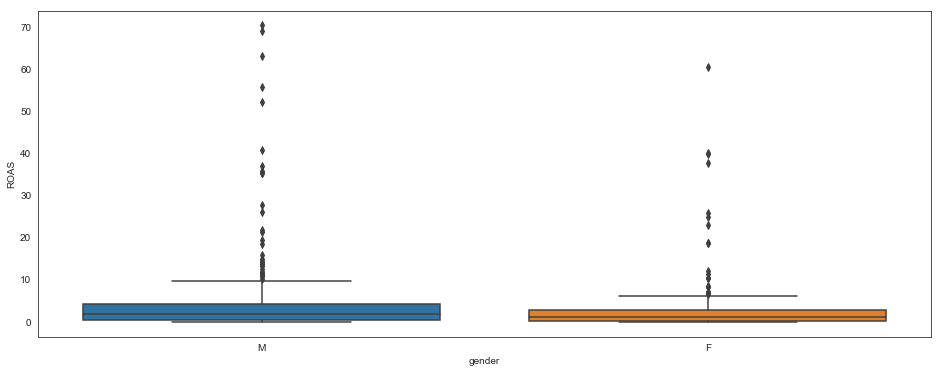

In [371]:
sns.boxplot(x="gender", y="ROAS",data=cam_df)
plt.show()

In [379]:
grouped_interest = cam_df.groupby('interest').agg({'ROAS':['median','mean'],'Clicks':'sum'}) 
grouped_interest.columns = ['_'.join(x) for x in grouped_interest.columns.ravel()]
grouped_interest = grouped_interest.sort_values(by='ROAS_mean', ascending=0)
grouped_interest.head(10)

,ROAS_median,ROAS_mean,Clicks_sum
interest,,,
2,2.740,inf,306
29,2.380,inf,3109
10,1.360,inf,3077
21,2.185,inf,493
66,1.280,inf,138
23,0.360,inf,372
63,1.755,inf,1615
32,1.560,inf,1129
26,0.865,inf,957


# to be continued...